In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from logreg_package.logreg import LogisticRegression
from sklearn.preprocessing import StandardScaler

### Logistic Regression
- **Logistic Regression** algorithm is implemented in the supplementary package to this notebook in the file ```logreg.py``` and is imported to this code file.
- This implementation of Logistic Regression uses **Mini-Batch Gradient Descent**.
- For **Batch Size** = 1, the algorithm translates to **Stochastic Gradient Descent**.

In [109]:
path = "../dataset/health care diabetes.csv"

In [110]:
data = pd.read_csv(path)

In [111]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Data Pre-processing
- All variables are standardized since each of them are numerical variables and subsequently used to train the model

In [112]:
Y = data['Outcome']
X = data.drop(labels=['Outcome'],axis=1)

X = pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)

data = pd.concat([X,Y],axis=1)

In [113]:
data = data.to_numpy()
data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.46849198,
         1.4259954 ,  1.        ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.36506078,
        -0.19067191,  0.        ],
       [ 1.23388019,  1.94372388, -0.26394125, ...,  0.60439732,
        -0.10558415,  1.        ],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.68519336,
        -0.27575966,  0.        ],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.37110101,
         1.17073215,  1.        ],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.47378505,
        -0.87137393,  0.        ]])

In [114]:
lr = LogisticRegression(data=data,target=-1,test_size=0.2,val_size=0.1,logistic_function='sigmoid')

### Training the Model
- An instance of the logistic regression is trained for each of the required learning rates - ```[1,0.1,0.01,0.001]``` - and the corresponding training loss, validation loss, training accuracy, and validation accuracy reported through the graphs shown below each code block.

Learning Rate = 1  
Max iterations = 200

In [115]:
lr.train(lr=1,n_epochs=200,batch_size=1)

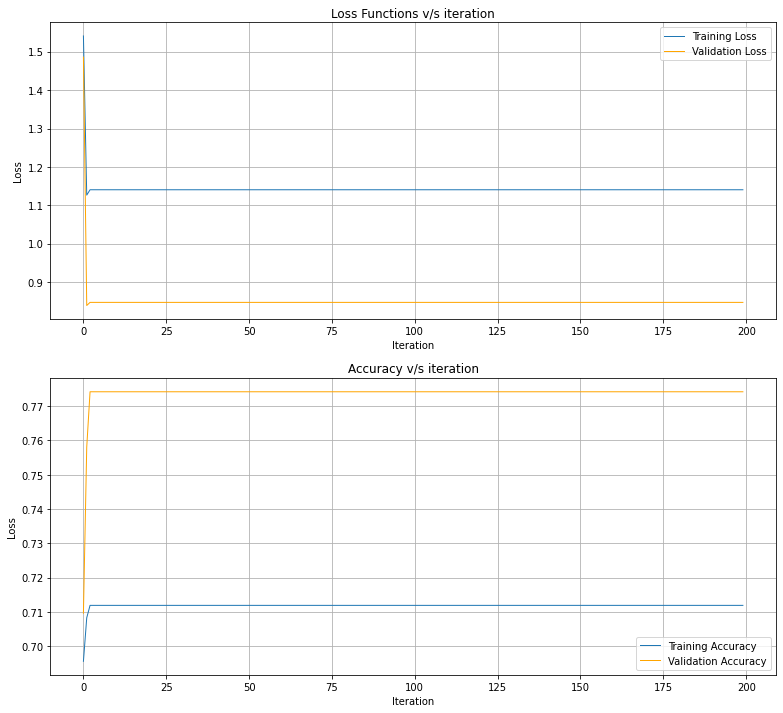

In [116]:
plt.subplots(2,1,figsize=(13,12))

plt.subplot(2,1,1)
plt.plot(lr.tr_loss, linestyle='-', linewidth=1, label='Training Loss')
plt.plot(lr.val_loss, color='orange', linestyle='-',linewidth=1, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Loss Functions v/s iteration")

plt.subplot(2,1,2)
plt.plot(lr.tr_acc, linestyle='-', linewidth=1, label='Training Accuracy')
plt.plot(lr.val_acc, color='orange', linestyle='-',linewidth=1, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Accuracy v/s iteration")

plt.show()

In [117]:
print(f"""
Training Accuracy : {np.mean(lr.tr_acc)*100}
Validation Accuracy : {np.mean(lr.val_acc)*100}
""")


Training Accuracy : 71.18568840579712
Validation Accuracy : 77.37903225806451



In [118]:
lr.predict()

In [119]:
print(f"""
Test Set Results
    Accuracy : {lr.ts_acc[0] * 100}
    Precision : {lr.ts_pr[0] * 100}
    Recall : {lr.ts_re[0] * 100}
    F1 Score : {lr.ts_f1[0] }
""")


Test Set Results
    Accuracy : 64.93506493506493
    Precision : 50.0
    Recall : 70.37037037037037
    F1 Score : 0.5846153846153846



Learning Rate = 0.1  
Max iterations = 200

In [120]:
lr.train(lr=0.1,n_epochs=200,batch_size=1)

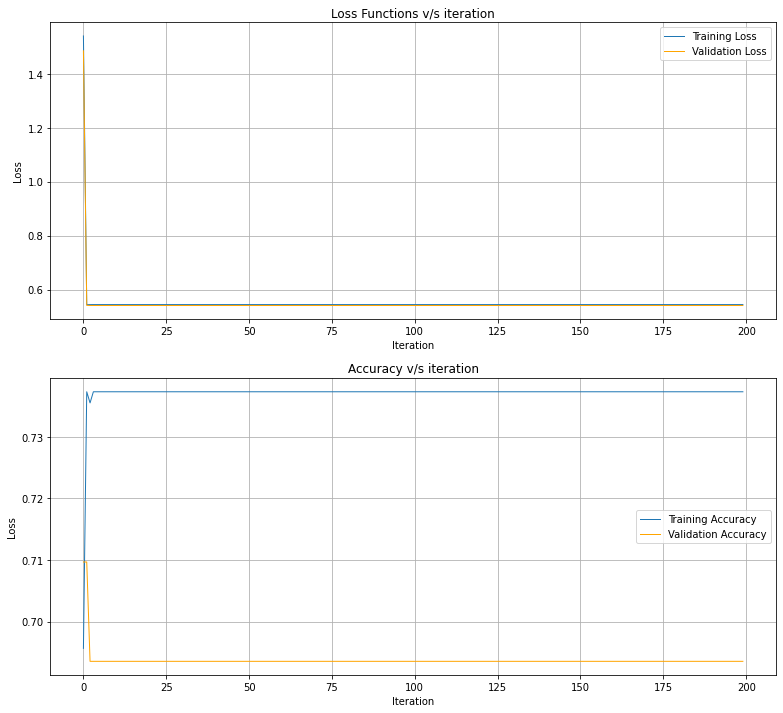

In [121]:
plt.subplots(2,1,figsize=(13,12))

plt.subplot(2,1,1)
plt.plot(lr.tr_loss, linestyle='-', linewidth=1, label='Training Loss')
plt.plot(lr.val_loss, color='orange', linestyle='-',linewidth=1, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Loss Functions v/s iteration")

plt.subplot(2,1,2)
plt.plot(lr.tr_acc, linestyle='-', linewidth=1, label='Training Accuracy')
plt.plot(lr.val_acc, color='orange', linestyle='-',linewidth=1, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Accuracy v/s iteration")

plt.show()

In [122]:
print(f"""
Training Accuracy : {np.mean(lr.tr_acc)*100}
Validation Accuracy : {np.mean(lr.val_acc)*100}
""")


Training Accuracy : 73.71014492753622
Validation Accuracy : 69.37096774193549



In [123]:
lr.predict()

In [124]:
print(f"""
Test Set Results
    Accuracy : {lr.ts_acc[0] * 100}
    Precision : {lr.ts_pr[0] * 100}
    Recall : {lr.ts_re[0] * 100}
    F1 Score : {lr.ts_f1[0] }
""")


Test Set Results
    Accuracy : 72.07792207792207
    Precision : 57.333333333333336
    Recall : 79.62962962962963
    F1 Score : 0.6666666666666667



Learning Rate = 0.01  
Max iterations = 200

In [125]:
lr.train(lr=0.01,n_epochs=200,batch_size=1)

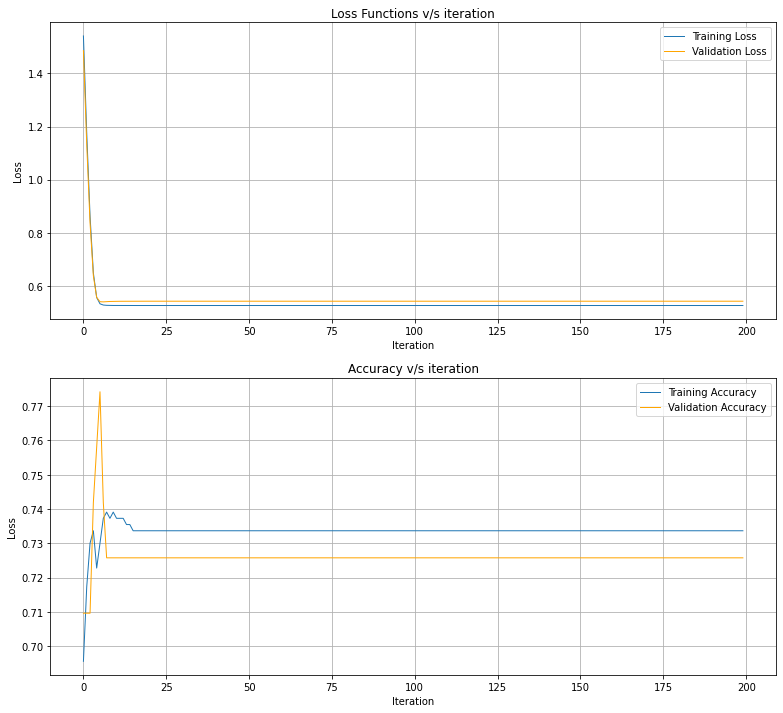

In [126]:
plt.subplots(2,1,figsize=(13,12))

plt.subplot(2,1,1)
plt.plot(lr.tr_loss, linestyle='-', linewidth=1, label='Training Loss')
plt.plot(lr.val_loss, color='orange', linestyle='-',linewidth=1, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Loss Functions v/s iteration")

plt.subplot(2,1,2)
plt.plot(lr.tr_acc, linestyle='-', linewidth=1, label='Training Accuracy')
plt.plot(lr.val_acc, color='orange', linestyle='-',linewidth=1, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Accuracy v/s iteration")

plt.show()

In [127]:
print(f"""
Training Accuracy : {np.mean(lr.tr_acc)*100}
Validation Accuracy : {np.mean(lr.val_acc)*100}
""")


Training Accuracy : 73.34963768115944
Validation Accuracy : 72.61290322580645



In [128]:
lr.predict()

In [129]:
print(f"""
Test Set Results
    Accuracy : {lr.ts_acc[0] * 100}
    Precision : {lr.ts_pr[0] * 100}
    Recall : {lr.ts_re[0] * 100}
    F1 Score : {lr.ts_f1[0] }
""")


Test Set Results
    Accuracy : 74.02597402597402
    Precision : 59.72222222222222
    Recall : 79.62962962962963
    F1 Score : 0.6825396825396824



Learning Rate = 0.001  
Max iterations = 200

In [130]:
lr.train(lr=0.001,n_epochs=200,batch_size=1)

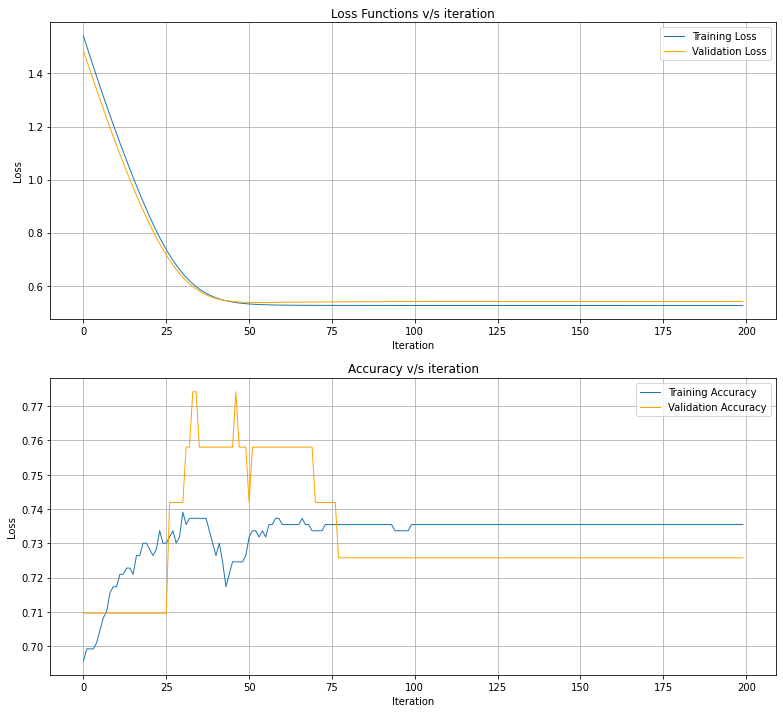

In [131]:
plt.subplots(2,1,figsize=(13,12))

plt.subplot(2,1,1)
plt.plot(lr.tr_loss, linestyle='-', linewidth=1, label='Training Loss')
plt.plot(lr.val_loss, color='orange', linestyle='-',linewidth=1, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Loss Functions v/s iteration")

plt.subplot(2,1,2)
plt.plot(lr.tr_acc, linestyle='-', linewidth=1, label='Training Accuracy')
plt.plot(lr.val_acc, color='orange', linestyle='-',linewidth=1, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Accuracy v/s iteration")

plt.show()

In [132]:
print(f"""
Training Accuracy : {np.mean(lr.tr_acc)*100}
Validation Accuracy : {np.mean(lr.val_acc)*100}
""")


Training Accuracy : 73.25
Validation Accuracy : 73.11290322580646



In [133]:
lr.predict()

In [134]:
print(f"""
Test Set Results
    Accuracy : {lr.ts_acc[0] * 100}
    Precision : {lr.ts_pr[0] * 100}
    Recall : {lr.ts_re[0] * 100}
    F1 Score : {lr.ts_f1[0] }
""")


Test Set Results
    Accuracy : 74.02597402597402
    Precision : 59.45945945945946
    Recall : 81.48148148148148
    F1 Score : 0.6875



### Analysing the Results
- The best set of training and validation accuracy is seen for **Learning Rate = ```0.001```** (with Max iterations set to a constant = ```200```)
- The best performance on the test set is also seen for **Learning Rate = ```0.001```** (with Max iterations set to a constant = ```200```) with **Accuracy = ```74.025%```** and **Recall = ```81.481%```**
- The **F1 score** (= **```0.6875```)** also indicates good performance 

### L1 Regularization
- A new model is trained with **L1 (LASSO) regularization** (with varied values for the **regularization parameter &lambda; ∊ ```[0.1,0.05,0.01,0.001]```**)

In [135]:
lr.train(lr=0.001,n_epochs=200,batch_size=1,regularization='l1',l1_penalty=0.1)

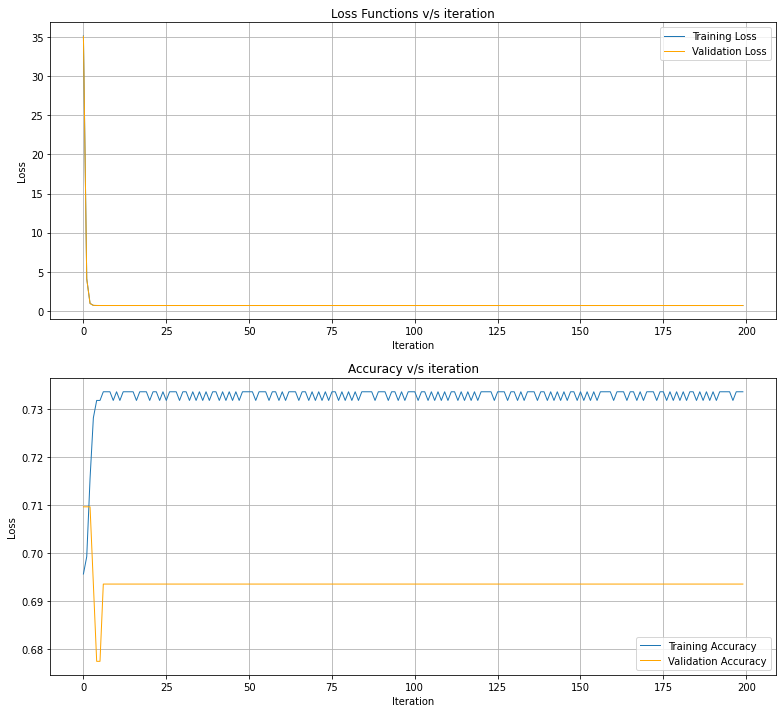

In [136]:
plt.subplots(2,1,figsize=(13,12))

plt.subplot(2,1,1)
plt.plot(lr.tr_loss, linestyle='-', linewidth=1, label='Training Loss')
plt.plot(lr.val_loss, color='orange', linestyle='-',linewidth=1, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Loss Functions v/s iteration")

plt.subplot(2,1,2)
plt.plot(lr.tr_acc, linestyle='-', linewidth=1, label='Training Accuracy')
plt.plot(lr.val_acc, color='orange', linestyle='-',linewidth=1, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Accuracy v/s iteration")

plt.show()

In [137]:
print(f"""
Training Accuracy : {np.mean(lr.tr_acc)*100}
Validation Accuracy : {np.mean(lr.val_acc)*100}
""")


Training Accuracy : 73.25815217391305
Validation Accuracy : 69.36290322580645



In [138]:
lr.predict()

In [139]:
print(f"""
Test Set Results
    Accuracy : {lr.ts_acc[0] * 100}
    Precision : {lr.ts_pr[0] * 100}
    Recall : {lr.ts_re[0] * 100}
    F1 Score : {lr.ts_f1[0] }
""")


Test Set Results
    Accuracy : 69.48051948051948
    Precision : 54.929577464788736
    Recall : 72.22222222222221
    F1 Score : 0.624



In [140]:
lr.train(lr=0.001,n_epochs=200,batch_size=1,regularization='l1',l1_penalty=0.05)

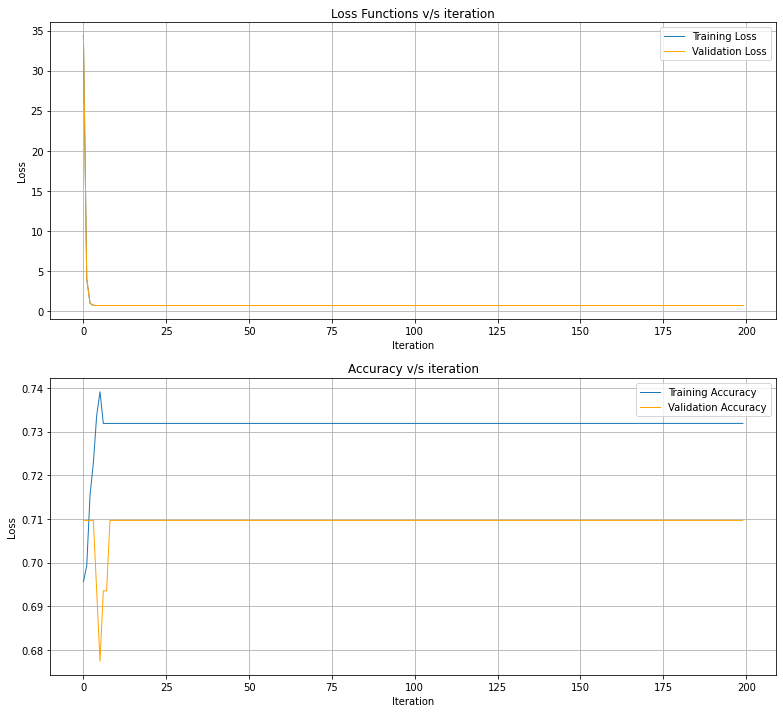

In [141]:
plt.subplots(2,1,figsize=(13,12))

plt.subplot(2,1,1)
plt.plot(lr.tr_loss, linestyle='-', linewidth=1, label='Training Loss')
plt.plot(lr.val_loss, color='orange', linestyle='-',linewidth=1, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Loss Functions v/s iteration")

plt.subplot(2,1,2)
plt.plot(lr.tr_acc, linestyle='-', linewidth=1, label='Training Accuracy')
plt.plot(lr.val_acc, color='orange', linestyle='-',linewidth=1, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Accuracy v/s iteration")

plt.show()

In [142]:
print(f"""
Training Accuracy : {np.mean(lr.tr_acc)*100}
Validation Accuracy : {np.mean(lr.val_acc)*100}
""")


Training Accuracy : 73.14583333333333
Validation Accuracy : 70.92741935483872



In [143]:
lr.predict()

In [144]:
print(f"""
Test Set Results
    Accuracy : {lr.ts_acc[0] * 100}
    Precision : {lr.ts_pr[0] * 100}
    Recall : {lr.ts_re[0] * 100}
    F1 Score : {lr.ts_f1[0] }
""")


Test Set Results
    Accuracy : 70.77922077922078
    Precision : 56.16438356164384
    Recall : 75.92592592592592
    F1 Score : 0.6456692913385828



In [145]:
lr.train(lr=0.001,n_epochs=200,batch_size=1,regularization='l1',l1_penalty=0.01)

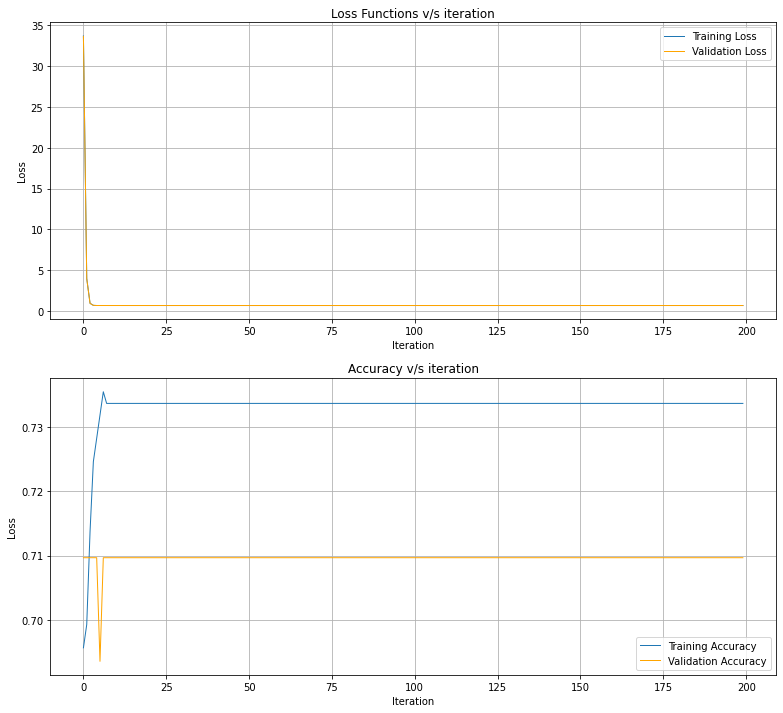

In [146]:
plt.subplots(2,1,figsize=(13,12))

plt.subplot(2,1,1)
plt.plot(lr.tr_loss, linestyle='-', linewidth=1, label='Training Loss')
plt.plot(lr.val_loss, color='orange', linestyle='-',linewidth=1, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Loss Functions v/s iteration")

plt.subplot(2,1,2)
plt.plot(lr.tr_acc, linestyle='-', linewidth=1, label='Training Accuracy')
plt.plot(lr.val_acc, color='orange', linestyle='-',linewidth=1, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Accuracy v/s iteration")

plt.show()

In [147]:
print(f"""
Training Accuracy : {np.mean(lr.tr_acc)*100}
Validation Accuracy : {np.mean(lr.val_acc)*100}
""")


Training Accuracy : 73.31612318840581
Validation Accuracy : 70.95967741935485



In [148]:
lr.predict()

In [149]:
print(f"""
Test Set Results
    Accuracy : {lr.ts_acc[0] * 100}
    Precision : {lr.ts_pr[0] * 100}
    Recall : {lr.ts_re[0] * 100}
    F1 Score : {lr.ts_f1[0] }
""")


Test Set Results
    Accuracy : 69.48051948051948
    Precision : 54.929577464788736
    Recall : 72.22222222222221
    F1 Score : 0.624



In [150]:
lr.train(lr=0.001,n_epochs=200,batch_size=1,regularization='l1',l1_penalty=0.001)

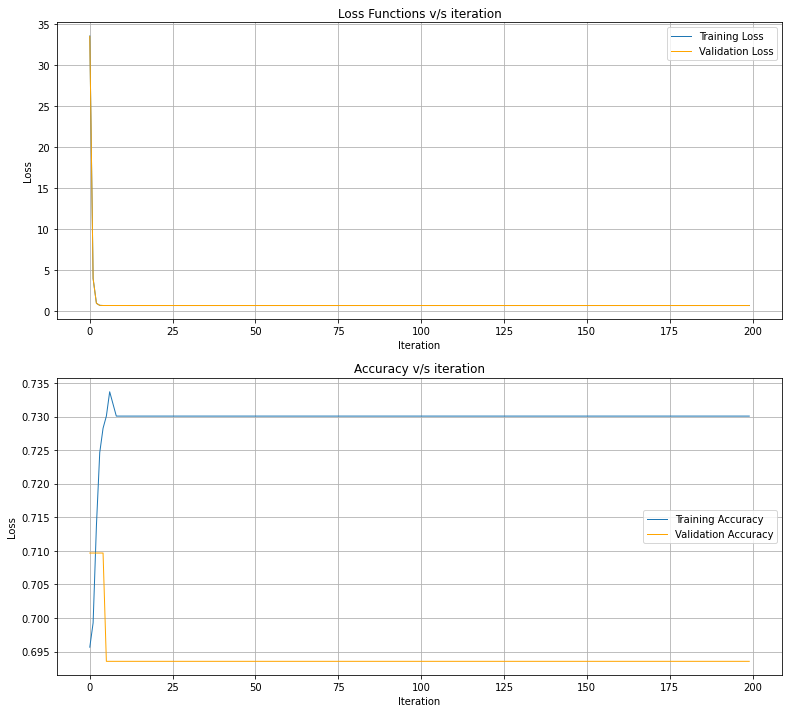

In [151]:
plt.subplots(2,1,figsize=(13,12))

plt.subplot(2,1,1)
plt.plot(lr.tr_loss, linestyle='-', linewidth=1, label='Training Loss')
plt.plot(lr.val_loss, color='orange', linestyle='-',linewidth=1, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Loss Functions v/s iteration")

plt.subplot(2,1,2)
plt.plot(lr.tr_acc, linestyle='-', linewidth=1, label='Training Accuracy')
plt.plot(lr.val_acc, color='orange', linestyle='-',linewidth=1, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Accuracy v/s iteration")

plt.show()

In [152]:
print(f"""
Training Accuracy : {np.mean(lr.tr_acc)*100}
Validation Accuracy : {np.mean(lr.val_acc)*100}
""")


Training Accuracy : 72.96557971014494
Validation Accuracy : 69.39516129032258



In [153]:
lr.predict()

In [154]:
print(f"""
Test Set Results
    Accuracy : {lr.ts_acc[0] * 100}
    Precision : {lr.ts_pr[0] * 100}
    Recall : {lr.ts_re[0] * 100}
    F1 Score : {lr.ts_f1[0] }
""")


Test Set Results
    Accuracy : 68.83116883116884
    Precision : 54.166666666666664
    Recall : 72.22222222222221
    F1 Score : 0.619047619047619



### Results from L1-regularization
- The best performance on the training and validation set for models trained with **L1 regularization** was obtained for **&lambda; = ```0.01```**, followed very closely by **&lambda; = ```0.05```**.
- The best performance on the testing set was seen for **&lambda; = ```0.05```** with **Accuracy = ```70.779```** and **Recall = ```75.925```**.
- This is also validated by it achieving the highest **F1 score = ```0.645```** out of them all.

### L2 Regularization
- A new model is trained with **L2 (Ridge Regression) regularization** (with varied values for the **regularization parameter &lambda; ∊ ```[0.1,0.05,0.01,0.001]```**)

In [155]:
lr.train(lr=0.001,n_epochs=200,batch_size=1,regularization='l2',l2_penalty=2)

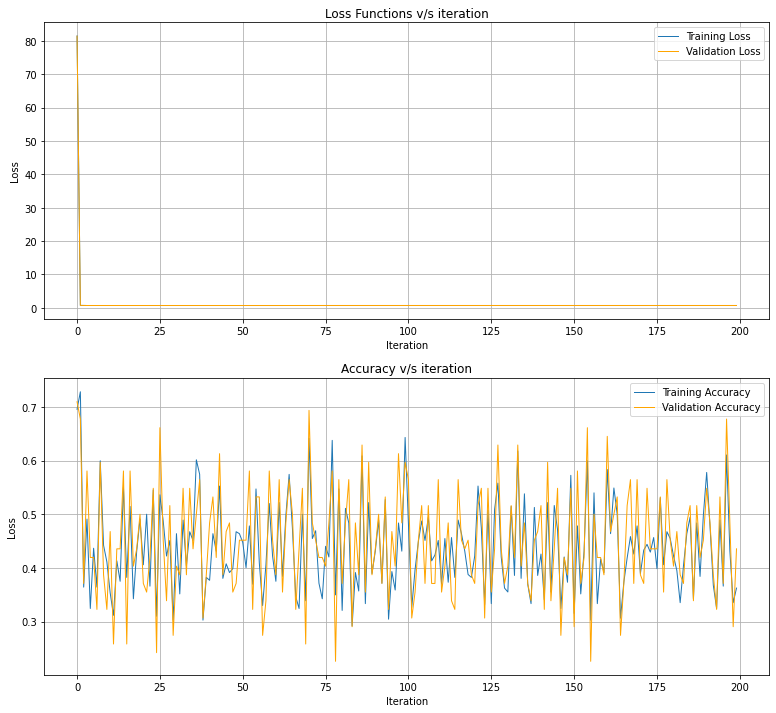

In [156]:
plt.subplots(2,1,figsize=(13,12))

plt.subplot(2,1,1)
plt.plot(lr.tr_loss, linestyle='-', linewidth=1, label='Training Loss')
plt.plot(lr.val_loss, color='orange', linestyle='-',linewidth=1, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Loss Functions v/s iteration")

plt.subplot(2,1,2)
plt.plot(lr.tr_acc, linestyle='-', linewidth=1, label='Training Accuracy')
plt.plot(lr.val_acc, color='orange', linestyle='-',linewidth=1, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Accuracy v/s iteration")

plt.show()

In [157]:
print(f"""
Training Accuracy : {np.mean(lr.tr_acc)*100}
Validation Accuracy : {np.mean(lr.val_acc)*100}
""")


Training Accuracy : 43.79347826086956
Validation Accuracy : 44.87903225806451



In [158]:
lr.predict()

In [159]:
print(f"""
Test Set Results
    Accuracy : {lr.ts_acc[0] * 100}
    Precision : {lr.ts_pr[0] * 100}
    Recall : {lr.ts_re[0] * 100}
    F1 Score : {lr.ts_f1[0] }
""")


Test Set Results
    Accuracy : 31.818181818181817
    Precision : 20.689655172413794
    Recall : 33.33333333333333
    F1 Score : 0.2553191489361702



In [160]:
lr.train(lr=0.001,n_epochs=200,batch_size=1,regularization='l2',l2_penalty=0.05)

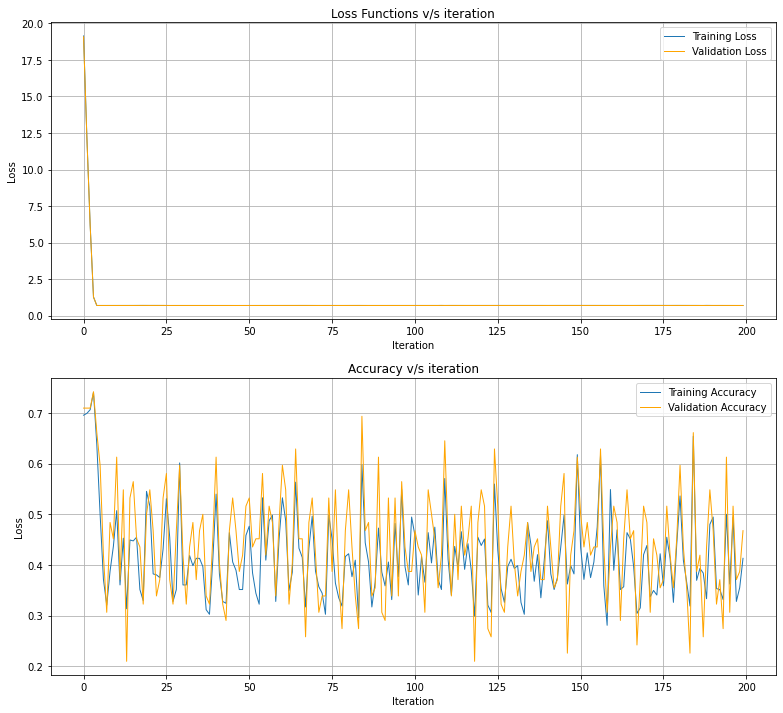

In [161]:
plt.subplots(2,1,figsize=(13,12))

plt.subplot(2,1,1)
plt.plot(lr.tr_loss, linestyle='-', linewidth=1, label='Training Loss')
plt.plot(lr.val_loss, color='orange', linestyle='-',linewidth=1, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Loss Functions v/s iteration")

plt.subplot(2,1,2)
plt.plot(lr.tr_acc, linestyle='-', linewidth=1, label='Training Accuracy')
plt.plot(lr.val_acc, color='orange', linestyle='-',linewidth=1, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Accuracy v/s iteration")

plt.show()

In [162]:
print(f"""
Training Accuracy : {np.mean(lr.tr_acc)*100}
Validation Accuracy : {np.mean(lr.val_acc)*100}
""")


Training Accuracy : 41.61322463768116
Validation Accuracy : 44.28225806451613



In [163]:
lr.predict()

In [164]:
print(f"""
Test Set Results
    Accuracy : {lr.ts_acc[0] * 100}
    Precision : {lr.ts_pr[0] * 100}
    Recall : {lr.ts_re[0] * 100}
    F1 Score : {lr.ts_f1[0] }
""")


Test Set Results
    Accuracy : 44.8051948051948
    Precision : 30.864197530864196
    Recall : 46.2962962962963
    F1 Score : 0.37037037037037035



In [165]:
lr.train(lr=0.001,n_epochs=200,batch_size=1,regularization='l2',l2_penalty=0.01)

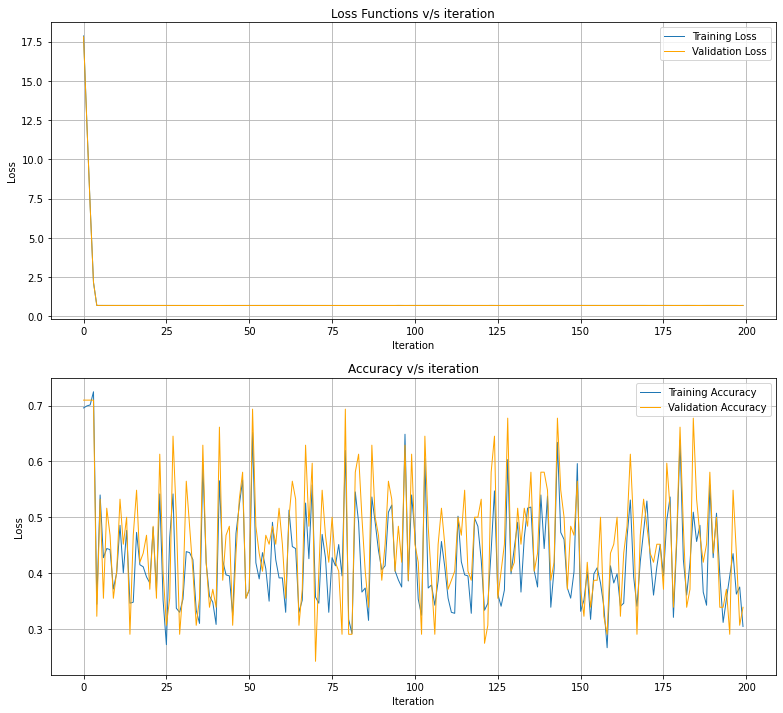

In [166]:
plt.subplots(2,1,figsize=(13,12))

plt.subplot(2,1,1)
plt.plot(lr.tr_loss, linestyle='-', linewidth=1, label='Training Loss')
plt.plot(lr.val_loss, color='orange', linestyle='-',linewidth=1, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Loss Functions v/s iteration")

plt.subplot(2,1,2)
plt.plot(lr.tr_acc, linestyle='-', linewidth=1, label='Training Accuracy')
plt.plot(lr.val_acc, color='orange', linestyle='-',linewidth=1, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Accuracy v/s iteration")

plt.show()

In [167]:
print(f"""
Training Accuracy : {np.mean(lr.tr_acc)*100}
Validation Accuracy : {np.mean(lr.val_acc)*100}
""")


Training Accuracy : 42.768115942028984
Validation Accuracy : 45.814516129032256



In [168]:
lr.predict()

In [169]:
print(f"""
Test Set Results
    Accuracy : {lr.ts_acc[0] * 100}
    Precision : {lr.ts_pr[0] * 100}
    Recall : {lr.ts_re[0] * 100}
    F1 Score : {lr.ts_f1[0] }
""")


Test Set Results
    Accuracy : 54.54545454545454
    Precision : 40.909090909090914
    Recall : 66.66666666666666
    F1 Score : 0.5070422535211268



In [170]:
lr.train(lr=0.001,n_epochs=200,batch_size=1,regularization='l2',l2_penalty=0.001)

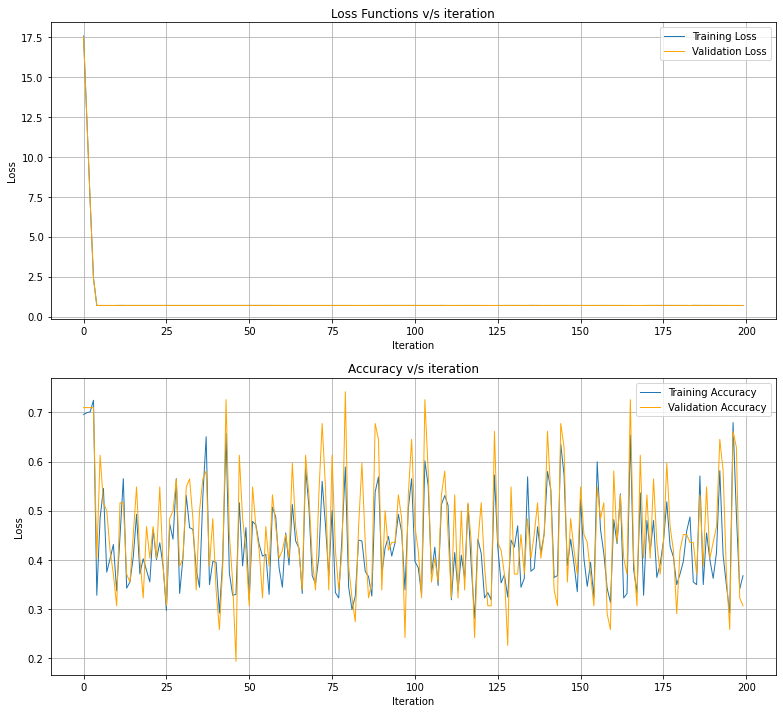

In [171]:
plt.subplots(2,1,figsize=(13,12))

plt.subplot(2,1,1)
plt.plot(lr.tr_loss, linestyle='-', linewidth=1, label='Training Loss')
plt.plot(lr.val_loss, color='orange', linestyle='-',linewidth=1, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Loss Functions v/s iteration")

plt.subplot(2,1,2)
plt.plot(lr.tr_acc, linestyle='-', linewidth=1, label='Training Accuracy')
plt.plot(lr.val_acc, color='orange', linestyle='-',linewidth=1, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Accuracy v/s iteration")

plt.show()

In [172]:
print(f"""
Training Accuracy : {np.mean(lr.tr_acc)*100}
Validation Accuracy : {np.mean(lr.val_acc)*100}
""")


Training Accuracy : 43.04347826086956
Validation Accuracy : 45.556451612903224



In [173]:
lr.predict()

In [174]:
print(f"""
Test Set Results
    Accuracy : {lr.ts_acc[0] * 100}
    Precision : {lr.ts_pr[0] * 100}
    Recall : {lr.ts_re[0] * 100}
    F1 Score : {lr.ts_f1[0] }
""")


Test Set Results
    Accuracy : 42.857142857142854
    Precision : 29.268292682926827
    Recall : 44.44444444444444
    F1 Score : 0.3529411764705882



### Results from L2-regularization
- The best performance on the training and validation set for models trained with **L2 regularization** was obtained for **&lambda; = ```0.001```**, followed very closely by **&lambda; = ```0.01```**.
- The best performance on the testing set was seen for **&lambda; = ```0.01```** with **Accuracy = ```54.545```** and **Recall = ```66.666```**.
- This is also validated by it achieving the highest **F1 score = ```0.507```** out of them all.
- It can, however, be clearly seen that model trained with **L2 regularization** performs consistently poorly as compared to **L1 regularization** or no regularization.

### Hyperbolic Tangent Function
- The **sigmoid** function is replaced by the **hyperbolic tan function** i.e. **tanh(z)**.
- The loss function remains the same, since **tanh(z)** can be mapped from **```(-1,1)```** to **```(0,1)```** as **f(z) = (tanh(z) + 1)/2**.

In [175]:
lr = LogisticRegression(data=data,target=-1,test_size=0.2,val_size=0.1,logistic_function='tanh')

In [176]:
lr.train(lr=0.0001,n_epochs=500,batch_size=1,regularization=None)

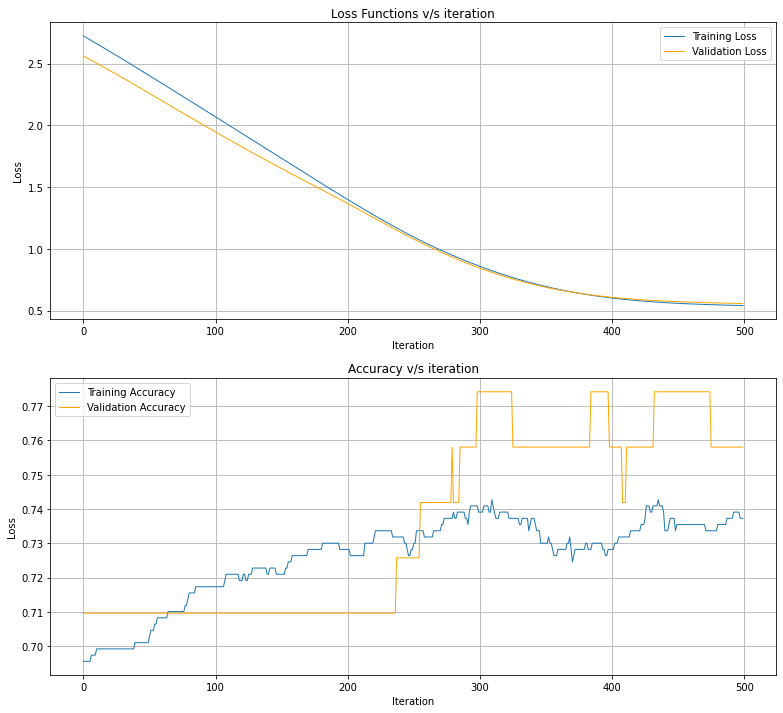

In [177]:
plt.subplots(2,1,figsize=(13,12))

plt.subplot(2,1,1)
plt.plot(lr.tr_loss, linestyle='-', linewidth=1, label='Training Loss')
plt.plot(lr.val_loss, color='orange', linestyle='-',linewidth=1, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Loss Functions v/s iteration")

plt.subplot(2,1,2)
plt.plot(lr.tr_acc, linestyle='-', linewidth=1, label='Training Accuracy')
plt.plot(lr.val_acc, color='orange', linestyle='-',linewidth=1, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Accuracy v/s iteration")

plt.show()

In [178]:
print(f"""
Training Accuracy : {np.mean(lr.tr_acc)*100}
Validation Accuracy : {np.mean(lr.val_acc)*100}
""")


Training Accuracy : 72.63007246376812
Validation Accuracy : 73.56451612903226



In [179]:
lr.predict()

In [180]:
print(f"""
Test Set Results
    Accuracy : {lr.ts_acc[0] * 100}
    Precision : {lr.ts_pr[0] * 100}
    Recall : {lr.ts_re[0] * 100}
    F1 Score : {lr.ts_f1[0] }
""")


Test Set Results
    Accuracy : 75.97402597402598
    Precision : 61.33333333333333
    Recall : 85.18518518518519
    F1 Score : 0.7131782945736435



### Results using tanh
- **Learning Rate = ```0.0001```** and **Max iterations = ```500```**
- Performance on the training and validation set is similar to the performance of the original model trained using the **sigmoid** function.
- However, the performance on the testing set with the set hyperparameters is better than the above referenced model with **Accuracy = ```75.974%```** and **Recall = ```85.185```**.
- This is also validated by a high **F1 score = ```0.713```**.

### Mini-Batch Gradient Descent
- A new model is trained with batch size increased to simulate **Mini-Batch Gradient Descent**.
- The batch size is varied in the range of ```[4,8,16,32,64]``` and the corresponding results analyzed.

In [281]:
mini_batch_results = {}

In [282]:
lr.train(lr=0.01,n_epochs=500,batch_size=4,regularization=None)

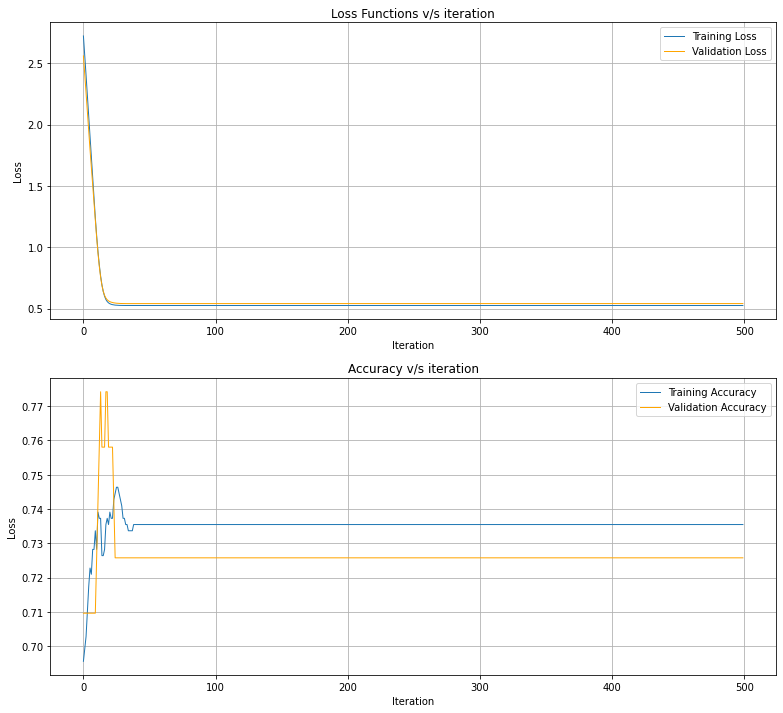

In [283]:
plt.subplots(2,1,figsize=(13,12))

plt.subplot(2,1,1)
plt.plot(lr.tr_loss, linestyle='-', linewidth=1, label='Training Loss')
plt.plot(lr.val_loss, color='orange', linestyle='-',linewidth=1, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Loss Functions v/s iteration")

plt.subplot(2,1,2)
plt.plot(lr.tr_acc, linestyle='-', linewidth=1, label='Training Accuracy')
plt.plot(lr.val_acc, color='orange', linestyle='-',linewidth=1, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Accuracy v/s iteration")

plt.show()

In [284]:
print(f"""
Training Accuracy : {np.mean(lr.tr_acc)*100}
Validation Accuracy : {np.mean(lr.val_acc)*100}
""")


Training Accuracy : 73.51956521739133
Validation Accuracy : 72.63548387096776



In [285]:
lr.predict()

In [286]:
print(f"""
Test Set Results
    Accuracy : {lr.ts_acc[0] * 100}
    Precision : {lr.ts_pr[0] * 100}
    Recall : {lr.ts_re[0] * 100}
    F1 Score : {lr.ts_f1[0] }
""")


Test Set Results
    Accuracy : 74.67532467532467
    Precision : 60.273972602739725
    Recall : 81.48148148148148
    F1 Score : 0.6929133858267718



In [287]:
mini_batch_results[lr.batch] = [lr.ts_acc[0] * 100, lr.ts_pr[0] * 100, lr.ts_re[0] * 100, lr.ts_f1[0]]

In [288]:
lr.train(lr=0.01,n_epochs=500,batch_size=8,regularization=None)

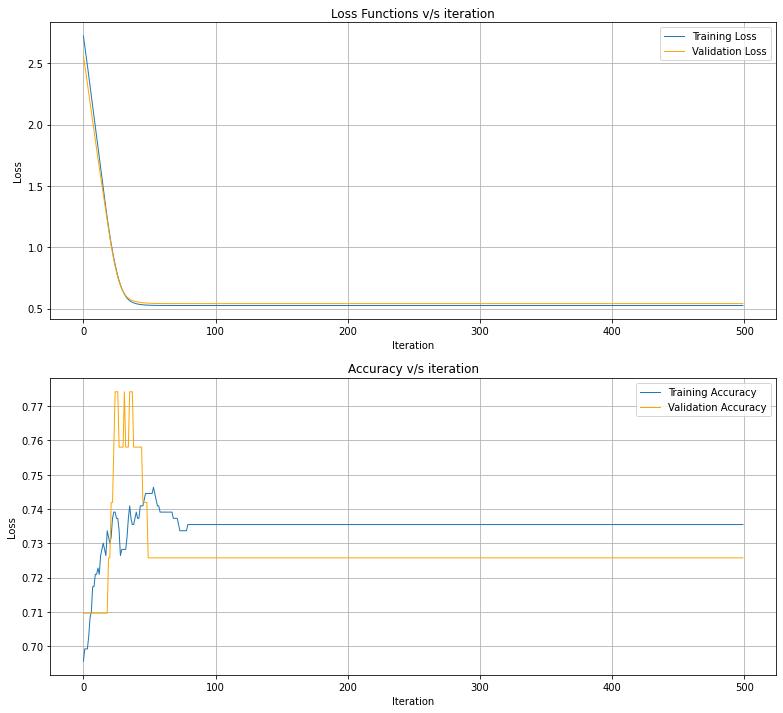

In [289]:
plt.subplots(2,1,figsize=(13,12))

plt.subplot(2,1,1)
plt.plot(lr.tr_loss, linestyle='-', linewidth=1, label='Training Loss')
plt.plot(lr.val_loss, color='orange', linestyle='-',linewidth=1, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Loss Functions v/s iteration")

plt.subplot(2,1,2)
plt.plot(lr.tr_acc, linestyle='-', linewidth=1, label='Training Accuracy')
plt.plot(lr.val_acc, color='orange', linestyle='-',linewidth=1, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Accuracy v/s iteration")

plt.show()

In [290]:
print(f"""
Training Accuracy : {np.mean(lr.tr_acc)*100}
Validation Accuracy : {np.mean(lr.val_acc)*100}
""")


Training Accuracy : 73.5021739130435
Validation Accuracy : 72.70322580645161



In [291]:
lr.predict()

In [292]:
print(f"""
Test Set Results
    Accuracy : {lr.ts_acc[0] * 100}
    Precision : {lr.ts_pr[0] * 100}
    Recall : {lr.ts_re[0] * 100}
    F1 Score : {lr.ts_f1[0] }
""")


Test Set Results
    Accuracy : 74.67532467532467
    Precision : 60.273972602739725
    Recall : 81.48148148148148
    F1 Score : 0.6929133858267718



In [293]:
mini_batch_results[lr.batch] = [lr.ts_acc[0] * 100, lr.ts_pr[0] * 100, lr.ts_re[0] * 100, lr.ts_f1[0]]

In [294]:
lr.train(lr=0.01,n_epochs=500,batch_size=16,regularization=None)

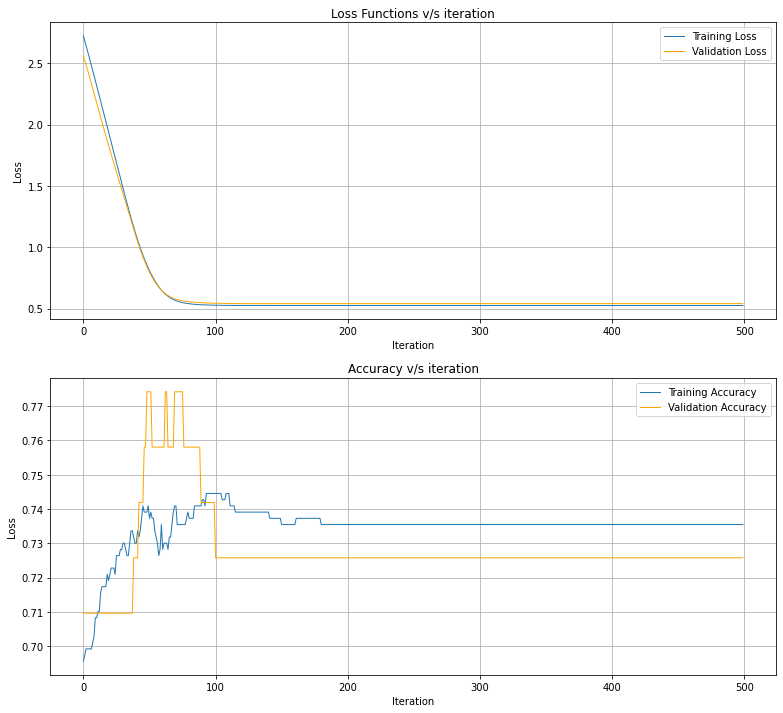

In [295]:
plt.subplots(2,1,figsize=(13,12))

plt.subplot(2,1,1)
plt.plot(lr.tr_loss, linestyle='-', linewidth=1, label='Training Loss')
plt.plot(lr.val_loss, color='orange', linestyle='-',linewidth=1, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Loss Functions v/s iteration")

plt.subplot(2,1,2)
plt.plot(lr.tr_acc, linestyle='-', linewidth=1, label='Training Accuracy')
plt.plot(lr.val_acc, color='orange', linestyle='-',linewidth=1, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Accuracy v/s iteration")

plt.show()

In [296]:
print(f"""
Training Accuracy : {np.mean(lr.tr_acc)*100}
Validation Accuracy : {np.mean(lr.val_acc)*100}
""")


Training Accuracy : 73.47898550724639
Validation Accuracy : 72.8258064516129



In [297]:
lr.predict()

In [298]:
print(f"""
Test Set Results
    Accuracy : {lr.ts_acc[0] * 100}
    Precision : {lr.ts_pr[0] * 100}
    Recall : {lr.ts_re[0] * 100}
    F1 Score : {lr.ts_f1[0] }
""")


Test Set Results
    Accuracy : 74.02597402597402
    Precision : 59.45945945945946
    Recall : 81.48148148148148
    F1 Score : 0.6875



In [299]:
mini_batch_results[lr.batch] = [lr.ts_acc[0] * 100, lr.ts_pr[0] * 100, lr.ts_re[0] * 100, lr.ts_f1[0]]

In [300]:
lr.train(lr=0.01,n_epochs=500,batch_size=32,regularization=None)

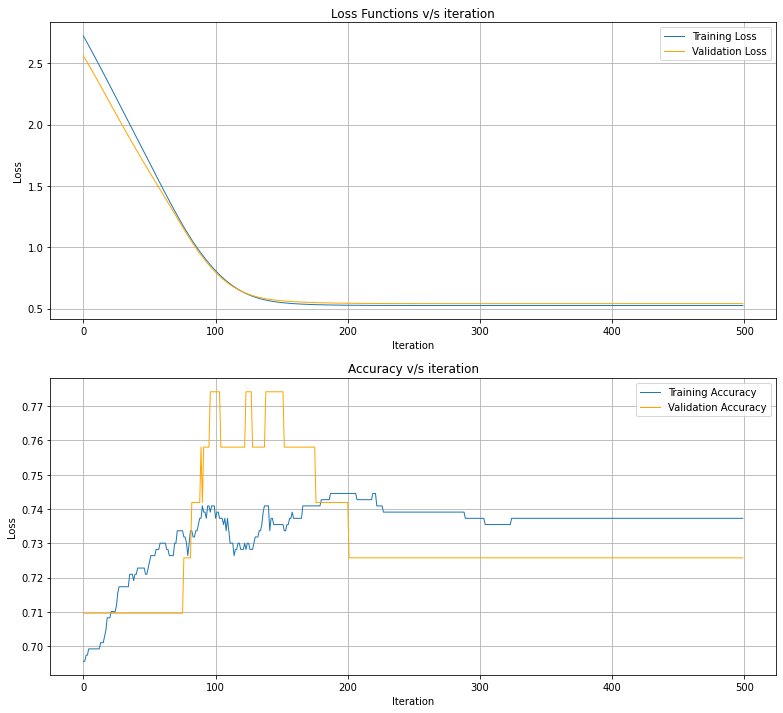

In [301]:
plt.subplots(2,1,figsize=(13,12))

plt.subplot(2,1,1)
plt.plot(lr.tr_loss, linestyle='-', linewidth=1, label='Training Loss')
plt.plot(lr.val_loss, color='orange', linestyle='-',linewidth=1, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Loss Functions v/s iteration")

plt.subplot(2,1,2)
plt.plot(lr.tr_acc, linestyle='-', linewidth=1, label='Training Accuracy')
plt.plot(lr.val_acc, color='orange', linestyle='-',linewidth=1, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Accuracy v/s iteration")

plt.show()

In [302]:
print(f"""
Training Accuracy : {np.mean(lr.tr_acc)*100}
Validation Accuracy : {np.mean(lr.val_acc)*100}
""")


Training Accuracy : 73.46159420289855
Validation Accuracy : 73.08387096774194



In [303]:
lr.predict()

In [304]:
print(f"""
Test Set Results
    Accuracy : {lr.ts_acc[0] * 100}
    Precision : {lr.ts_pr[0] * 100}
    Recall : {lr.ts_re[0] * 100}
    F1 Score : {lr.ts_f1[0] }
""")


Test Set Results
    Accuracy : 74.02597402597402
    Precision : 59.45945945945946
    Recall : 81.48148148148148
    F1 Score : 0.6875



In [305]:
mini_batch_results[lr.batch] = [lr.ts_acc[0] * 100, lr.ts_pr[0] * 100, lr.ts_re[0] * 100, lr.ts_f1[0]]

In [306]:
lr.train(lr=0.01,n_epochs=500,batch_size=64,regularization=None)

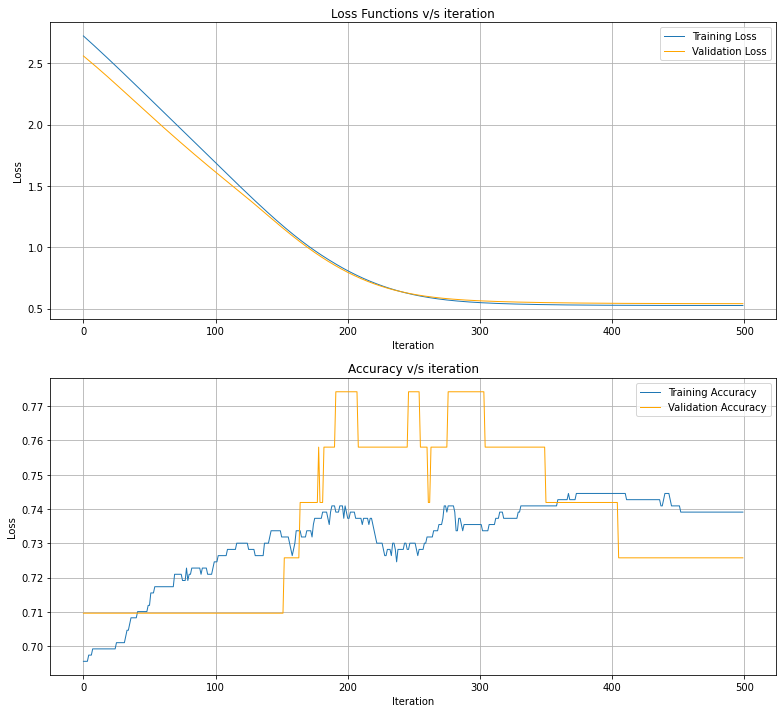

In [307]:
plt.subplots(2,1,figsize=(13,12))

plt.subplot(2,1,1)
plt.plot(lr.tr_loss, linestyle='-', linewidth=1, label='Training Loss')
plt.plot(lr.val_loss, color='orange', linestyle='-',linewidth=1, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Loss Functions v/s iteration")

plt.subplot(2,1,2)
plt.plot(lr.tr_acc, linestyle='-', linewidth=1, label='Training Accuracy')
plt.plot(lr.val_acc, color='orange', linestyle='-',linewidth=1, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Accuracy v/s iteration")

plt.show()

In [308]:
print(f"""
Training Accuracy : {np.mean(lr.tr_acc)*100}
Validation Accuracy : {np.mean(lr.val_acc)*100}
""")


Training Accuracy : 73.17608695652173
Validation Accuracy : 73.58064516129032



In [309]:
lr.predict()

In [310]:
print(f"""
Test Set Results
    Accuracy : {lr.ts_acc[0] * 100}
    Precision : {lr.ts_pr[0] * 100}
    Recall : {lr.ts_re[0] * 100}
    F1 Score : {lr.ts_f1[0] }
""")


Test Set Results
    Accuracy : 75.32467532467533
    Precision : 61.111111111111114
    Recall : 81.48148148148148
    F1 Score : 0.6984126984126984



In [311]:
mini_batch_results[lr.batch] = [lr.ts_acc[0] * 100, lr.ts_pr[0] * 100, lr.ts_re[0] * 100, lr.ts_f1[0]]

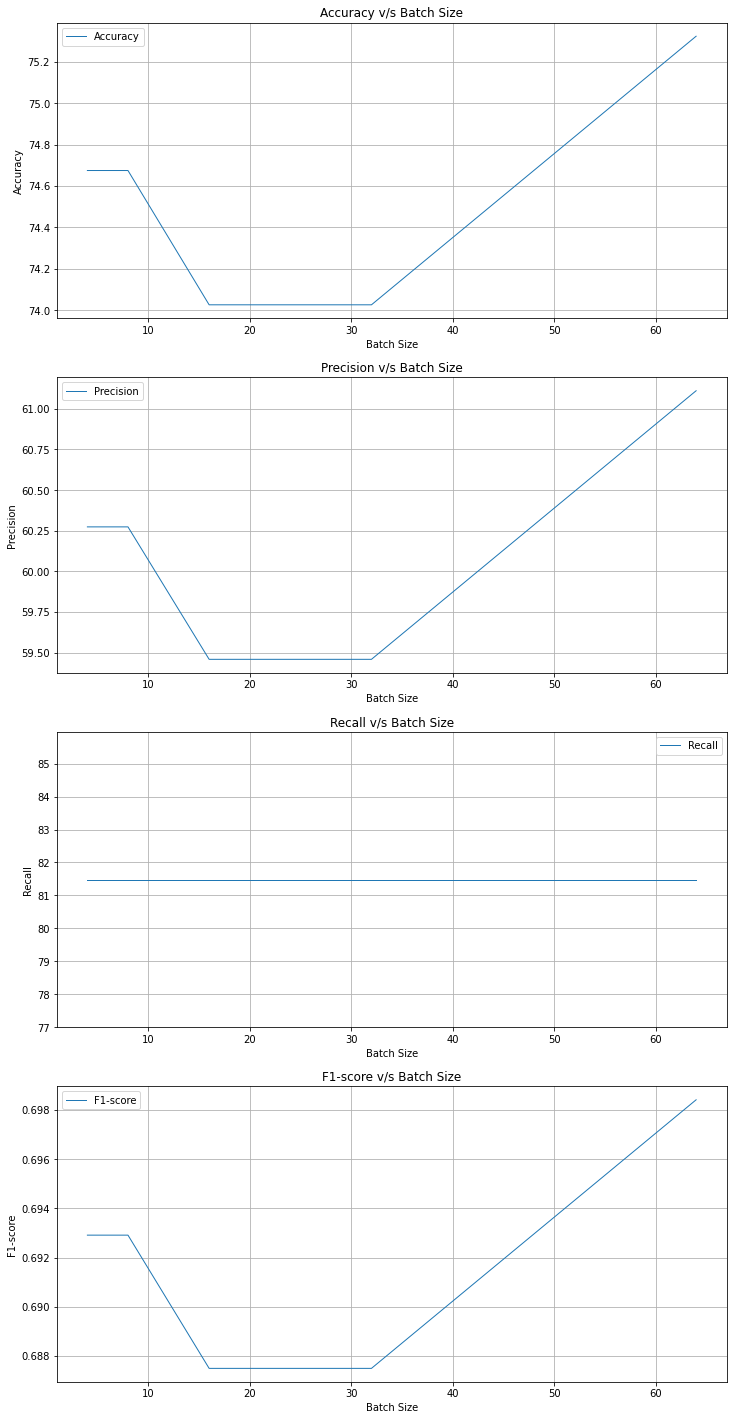

In [314]:
plt.subplots(4,1,figsize=(12,25))
labels = ['Accuracy','Precision','Recall','F1-score']
sizes = [4,8,16,32,64]

for i in range(4):
    y_vals = [mini_batch_results[j][i] for j in sizes]
    plt.subplot(4,1,i+1)
    plt.plot(sizes,y_vals,linestyle='-', linewidth=1, label=labels[i])
    plt.xlabel('Batch Size')
    plt.ylabel(labels[i])
    plt.legend()
    plt.grid(True)
    plt.title(labels[i] + " v/s Batch Size")

plt.show()

### Results from Mini-Batch Gradient Descent
- The performance of **Mini-batch gradient descent** initially decreases while constantly increasing the **batch size**; however, it then increases with increase in batch size showing a somewhat **positive quadratic correlation** between the batch size and the performance of the model.
- The convergence rate of smaller batch sizes is higher as compared to larger batch sizes.
- Thus, **SGD converges much faster than Mini-BGD**, since **SGD** can basically be seen as **Mini-BGD** with **batch size = ```1```**.